In [66]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import prince

In [67]:
house = pd.read_csv('ahs_cleaned-1.csv', index_col=0)

In [68]:
house.head(1).T

0
DIVISION                                      South Atlantic
TENURE     Owned or being bought by someone in your house...
YRBUILT                                                 2000
UNITSIZE                          2,000 to 2,499 square feet
HSHLDTYPE                    Married-couple family household
HHRACE                                            White only
HHSEX                                                   Male
HINCP                                                 257000
TOTHCAMT                                                1642
MARKETVAL                                             280249
MAINTAMT                                                1022
FUSEBLOW      No fuses / breakers blown in the last 3 months
SEWBREAK                  No breakdowns in the last 3 months
ROACH                         No signs in the last 12 months
RODENT                        No signs in the last 12 months
NOWIRE                                            Not broken
PLUGS                                             Not broken
COLD                                              Not broken
NOTOIL                                            Not broken
NOWAT                                             Not broken
FLOORHOLE                                         Not broken
FNDCRUMB                                          Not broken
PAINTPEEL                                         Not broken
ROOFHOLE                                          Not broken
ROOFSAG                                           Not broken
ROOFSHIN                                          Not broken
WALLCRACK                                         Not broken
WALLSIDE                                          Not broken
WALLSLOPE                                         Not broken
WINBOARD                                          Not broken
WINBROKE                                          Not broken
LEAKI                                             Not broken
MOLDBATH                                          Not broken

In [71]:
profile = ProfileReport(house, 
                        title="Report",
                        html ={'style':{'full_width':True}},
                        minimal=False)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [70]:
house.columns


Index(['DIVISION', 'TENURE', 'YRBUILT', 'UNITSIZE', 'HSHLDTYPE', 'HHRACE',
       'HHSEX', 'HINCP', 'TOTHCAMT', 'MARKETVAL', 'MAINTAMT', 'FUSEBLOW',
       'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD', 'NOTOIL',
       'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE', 'ROOFSAG',
       'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH'],
      dtype='object')

In [50]:
broken = house[['FUSEBLOW',
       'SEWBREAK', 'ROACH', 'RODENT', 'NOWIRE', 'PLUGS', 'COLD', 'NOTOIL',
       'NOWAT', 'FLOORHOLE', 'FNDCRUMB', 'PAINTPEEL', 'ROOFHOLE', 'ROOFSAG',
       'ROOFSHIN', 'WALLCRACK', 'WALLSIDE', 'WALLSLOPE', 'WINBOARD',
       'WINBROKE', 'LEAKI', 'MOLDBATH']]

In [51]:
mca = prince.MCA(n_components=2)
mca = mca.fit(broken)

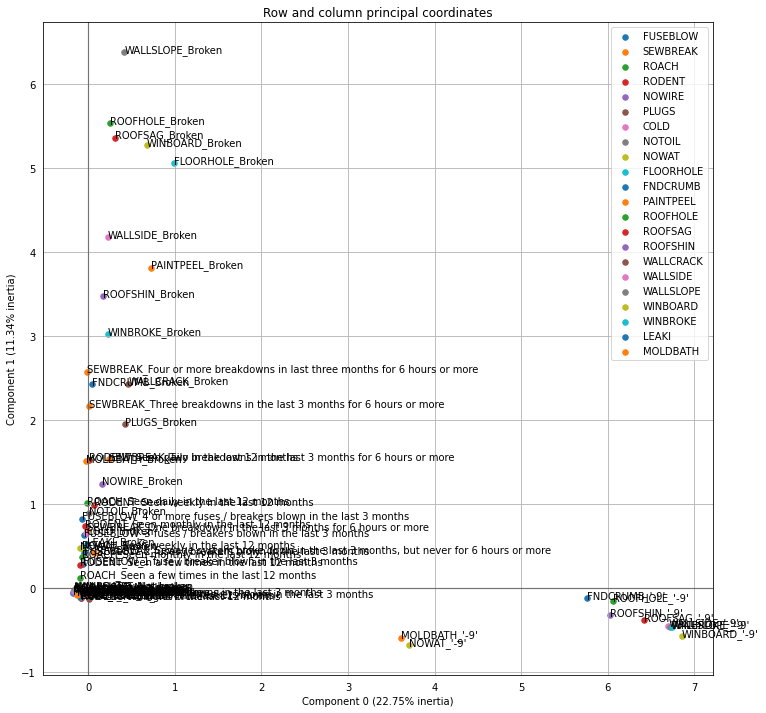

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline  


ax = mca.plot_coordinates(
     X=broken,
     ax=None,
     figsize=(12, 12),
     show_row_points=False,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=True,
     legend_n_cols=1
 )

In [72]:
mca.row_coordinates(broken)

0         1
0     -0.134418 -0.134388
1     -0.134418 -0.134388
2      0.656311  4.665644
3     -0.134679 -0.096479
4     -0.075075 -0.173791
...         ...       ...
63180 -0.134418 -0.134388
63181 -0.134740 -0.111872
63182 -0.134418 -0.134388
63183 -0.134418 -0.134388
63184 -0.134418 -0.134388

[63185 rows x 2 columns]

In [73]:
mca.column_coordinates(broken).sort_values(1, ascending=False)

0         1
WALLSLOPE_Broken  0.417828  6.385565
ROOFHOLE_Broken   0.250209  5.538247
ROOFSAG_Broken    0.313560  5.366286
WINBOARD_Broken   0.679956  5.275477
FLOORHOLE_Broken  0.988473  5.060245
...                    ...       ...
WALLSLOPE_'-9'    6.720807 -0.461521
WINBROKE_'-9'     6.735869 -0.462509
WINBOARD_'-9'     6.858339 -0.568762
MOLDBATH_'-9'     3.606571 -0.588019
NOWAT_'-9'        3.706118 -0.678264

[67 rows x 2 columns]

In [74]:
house['flouphouse_index'] = mca.row_coordinates(broken)[1]

In [75]:
mca.column_coordinates(broken)

0         1
FUSEBLOW_1 fuse / breaker blown in the last 3 m... -0.063491  0.293360
FUSEBLOW_2 fuses / breakers blown in the last 3... -0.047592  0.417873
FUSEBLOW_3 fuses / breakers blown in the last 3... -0.052353  0.632367
FUSEBLOW_4 or more fuses / breakers blown in th... -0.069433  0.826033
FUSEBLOW_No fuses / breakers blown in the last ... -0.087096 -0.097178
...                                                      ...       ...
LEAKI_Broken                                       -0.014563  0.525749
LEAKI_Not broken                                   -0.090883 -0.107005
MOLDBATH_'-9'                                       3.606571 -0.588019
MOLDBATH_Broken                                    -0.026008  1.510144
MOLDBATH_Not broken                                -0.130164 -0.075608

[67 rows x 2 columns]

In [76]:
# The most important cat is WALLSLOPE_Broken
mca.column_coordinates(broken).sort_values(1, ascending=False)

0         1
WALLSLOPE_Broken  0.417828  6.385565
ROOFHOLE_Broken   0.250209  5.538247
ROOFSAG_Broken    0.313560  5.366286
WINBOARD_Broken   0.679956  5.275477
FLOORHOLE_Broken  0.988473  5.060245
...                    ...       ...
WALLSLOPE_'-9'    6.720807 -0.461521
WINBROKE_'-9'     6.735869 -0.462509
WINBOARD_'-9'     6.858339 -0.568762
MOLDBATH_'-9'     3.606571 -0.588019
NOWAT_'-9'        3.706118 -0.678264

[67 rows x 2 columns]

In [62]:
# Who is renting vs owned
house['TENURE'].value_counts()

Owned or being bought by someone in your household    32972
Rented                                                20743
Occupied without payment of rent                        740
Name: TENURE, dtype: int64

In [63]:
# Conditional means
house.groupby('TENURE').agg({'flouphouse_index':'mean'})

flouphouse_index
TENURE                                                              
Occupied without payment of rent                            0.066518
Owned or being bought by someone in your household         -0.034582
Rented                                                     -0.022315

In [78]:
# Corr of income and index - negative but not very strong
house[['HINCP', 'flouphouse_index']].corr()

HINCP  flouphouse_index
HINCP             1.000000         -0.085664
flouphouse_index -0.085664          1.000000

In [65]:
# Cross tabulations for Hypothesis testing 
pd.crosstab(house.TENURE, house.HHRACE)

HHRACE                                              American Indian, Alaska Native only  \
TENURE                                                                                    
Occupied without payment of rent                                                     18   
Owned or being bought by someone in your household                                  274   
Rented                                                                              311   

HHRACE                                              Asian only  Black only  \
TENURE                                                                       
Occupied without payment of rent                            40         118   
Owned or being bought by someone in your household        2117        3177   
Rented                                                    1432        4920   

HHRACE                                              Other  White / Black  \
TENURE                                                                     
Occupied without payment of rent                       11              2   
Owned or being bought by someone in your household    389             60   
Rented                                                351            119   

HHRACE                                              White only  
TENURE                                                          
Occupied without payment of rent                           551  
Owned or being bought by someone in your household       26955  
Rented                                                   13610

In [81]:
# Drop "squatting" because there are not too many observations
house2 = house.query("TENURE != 'Occupied without payment of rent'")
pd.crosstab(house2.HHRACE, house2.TENURE)

TENURE                               Owned or being bought by someone in your household  \
HHRACE                                                                                    
American Indian, Alaska Native only                                                274    
Asian only                                                                        2117    
Black only                                                                        3177    
Other                                                                              389    
White / Black                                                                       60    
White only                                                                       26955    

TENURE                               Rented  
HHRACE                                       
American Indian, Alaska Native only     311  
Asian only                             1432  
Black only                             4920  
Other                                   351  
White / Black                           119  
White only                            13610

In [86]:
# Switcing to percents:
round(100 * pd.crosstab(house2.HHRACE, house2.TENURE, normalize='index'), 1)

TENURE                               Owned or being bought by someone in your household  \
HHRACE                                                                                    
American Indian, Alaska Native only                                               46.8    
Asian only                                                                        59.7    
Black only                                                                        39.2    
Other                                                                             52.6    
White / Black                                                                     33.5    
White only                                                                        66.4    

TENURE                               Rented  
HHRACE                                       
American Indian, Alaska Native only    53.2  
Asian only                             40.3  
Black only                             60.8  
Other                                  47.4  
White / Black                          66.5  
White only                             33.6

#### Note: "Black only" rent at 61% and "White only" owned at 66%

In [88]:
# Hypothesis Test for association
crosstab = pd.crosstab(house2.HHRACE, house2.TENURE)
from scipy import stats
stats.chi2_contingency(crosstab.values)

(2254.09517572649,
 0.0,
 5,
 array([[  359.09187378,   225.90812622],
        [ 2178.49070092,  1370.50929908],
        [ 4970.19983245,  3126.80016755],
        [  454.23587452,   285.76412548],
        [  109.87597505,    69.12402495],
        [24900.10574327, 15664.89425673]]))

#### P-value is rounded to 0 -> reject the H0 that there are not differences in raw percentages as we go from raw to raw. In fact, there are statistically significant differences.